In [924]:
import pandas as pd
import numpy as np
import os
import re
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

### Changes to dataset
Row 74. Gpa change from .2.84 to 2.84

In [925]:
fav_color_feature_enum = [
    {"brown?|Brown?|BROWN?":"Brown"},
    {"black?|Black?|BLACK?|/sBlack?|Black/s?|black/s?":"Black"},
    {"orange?|Orange?|ORANGE?":"Orange"},
    {"green?|Green?|GREEN?|Light Green?":"Green"},
    {"yellow?|Yellow?|YELLOW":"Yellow"},
    {"blue?|Blue?|BLUE?|Dark\sBlue?|Navy Blue?":"Blue"},
    {"Red?":"Red"},
    {"Pink?":"Pink"},
    {"Peach?":"Peach"},
    {"Gray and Brown?|Grey?|Mustard":"Gray"},
    {"Purple?|\sPurple?|Purple\s?":"Purple"},
    {"white?|White?":"White"}

]


birth_month_feature_enum = [
    {"january?":"January"},
    {"february?":"February"},
    {"march?":"March"},
    {"april?":"April"},
    {"may?":"May"},
    {"june?":"June"},
    {"july?":"July"},
    {"august?":"August"},
    {"september?|sep?":"September"},
    {"october?":"October"},
    {"november?":"November"},
    {"december?":"December"}
]

## Classes 
### Preprocessor
Used for processing the file and placing them in the correct normalized format

In [929]:
class preprocessor:
    def __init__(self,filename:str):
        self._filename:str = filename;
        self.dataset_raw:str = "";
        self.import_file()
        self.normalize()
        self.dataset_raw = self.dataset_raw.dropna() # Remove null rows

    #private
    def _match_exp(self,exp,col_name):
        for i in self.dataset_raw[col_name]:
            if(re.match(exp,i) is not None):
                print(i)

    def normalize_columns(self,input_val,enum_object):
        tag = "tagged"
        for i in enum_object:
            for key in i:
                if(input_val in key):
                    output = re.sub(key,i[key],input_val,flags=re.I)
                    return output
                else:
                    pass

    
    def normalize_columns_update(self,input_val,enum_object):
        tag = "tagged"
        for i in enum_object:
            for key in i:
                #if(input_val in key): <- The input must be present in the key for this to match
                if(re.match(key,input_val,flags=re.I) is not None):
                    output = re.sub(key,i[key],input_val,flags=re.I)
                    return output
                else:
                    pass

            
    #normalization

    def normalize(self):
        #find and replace skin color 
        arr = []
        for col in self.dataset_raw.columns:
            arr.append(col)
        #print("\nData labels are: " + str(arr))
        print("\nNormalizing data...")
        self.dataset_raw['FavoriteColor'] = self.dataset_raw['FavoriteColor'].str.strip()
        self.dataset_raw['FavoriteColor'] = self.dataset_raw['FavoriteColor'].map(lambda x:self.normalize_columns(x,fav_color_feature_enum))
        self.dataset_raw['BirthMonth'] = self.dataset_raw['BirthMonth'].str.strip()
        self.dataset_raw['BirthMonth'] = self.dataset_raw['BirthMonth'].map(lambda x:self.normalize_columns_update(x,birth_month_feature_enum))

    #public
    def import_file(self):
        print("\nImporting the input file...")

        cwd = os.getcwd() + '/Datasets/';
        self.dataset_raw = pd.read_csv(cwd + self._filename)
        self.dataset_raw.columns = [c.replace(' ', '_') for c in self.dataset_raw.columns]

    def display(self,rows=200):
        print(self.dataset_raw.head())

    def name_starting_with_letter(self,letter='H'):
        exp = '^H'
        self._match_exp(exp,'Name')

    def num_of_words_in_names(self,num = 3):
        exp = '^[\w]+\s[\w]+\s[\w]+'
        self._match_exp(exp,'Name')

    def percentage_match_on_cgpa(self,gpa=3):
        total_rows = self.dataset_raw.shape[0]
        num = 0
        for i in self.dataset_raw['CGPA']:
            if(float(i)>=gpa):
                num = num + 1
        perc = (num/total_rows)*100
        print("Percentage of students with CGPA above {}: {:.2f}".format(gpa,perc))

    def gender_ratio_pie_chart(self):
        self.dataset_raw.groupby(['Gender']).size().plot(kind='pie',y=self.dataset_raw.shape[0]).set_ylabel("Gender Ratio")

    def plot_gpa_on_histogram(self):
        col = self.dataset_raw
        col = col[col.Gender != 'Female']
        col.hist(column='CGPA', by='Gender', bins=[2.0, 2.6, 3.1, 4.0], grid=False)

    def plot_hssc_marks(self):
        self.dataset_raw_ = self.dataset_raw.drop(self.dataset_raw.index[1:120])
        self.dataset_raw_.plot(x='HSSC-1', y='Gender',kind='scatter',c='cornflowerblue',)
    
    def fav_color_bar(self):
        self.dataset_raw.groupby(['Gender'])['FavoriteColor'].value_counts().unstack().plot(kind='bar',stacked = True)

    def birth_month_line_chart(self):
        a = self.dataset_raw['BirthMonth'].value_counts()
        month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
        a = a.reindex(month_order,axis=0)
        a.plot(kind='line',title="Birthday distribution")

    def corr_matrix(self):

SyntaxError: incomplete input (2185836780.py, line 101)

In [927]:
s = 'March '
if(re.match('march?',s,flags=re.I) is not None):
    print("yes")

if(exp is not None):
    print("Starting with H")


# m = "march "

# r = re.sub('march','March',m,flags=re.I)
# print(r)

yes
Starting with H



Importing the input file...

Normalizing data...


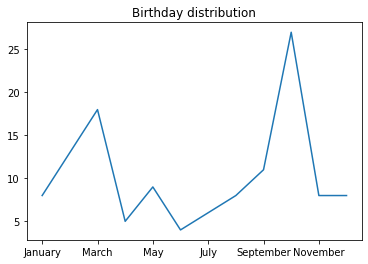

In [928]:
prep = preprocessor('hello.csv')
prep.corr_matrix()